In [1]:
import pandas as pd
more_info = pd.read_feather("../../data/more_info.feather")

/var/folders/w6/3q8zk6j94wb5nxvb3y79cxjc0000gr/T/ipykernel_36312/2655783758.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')


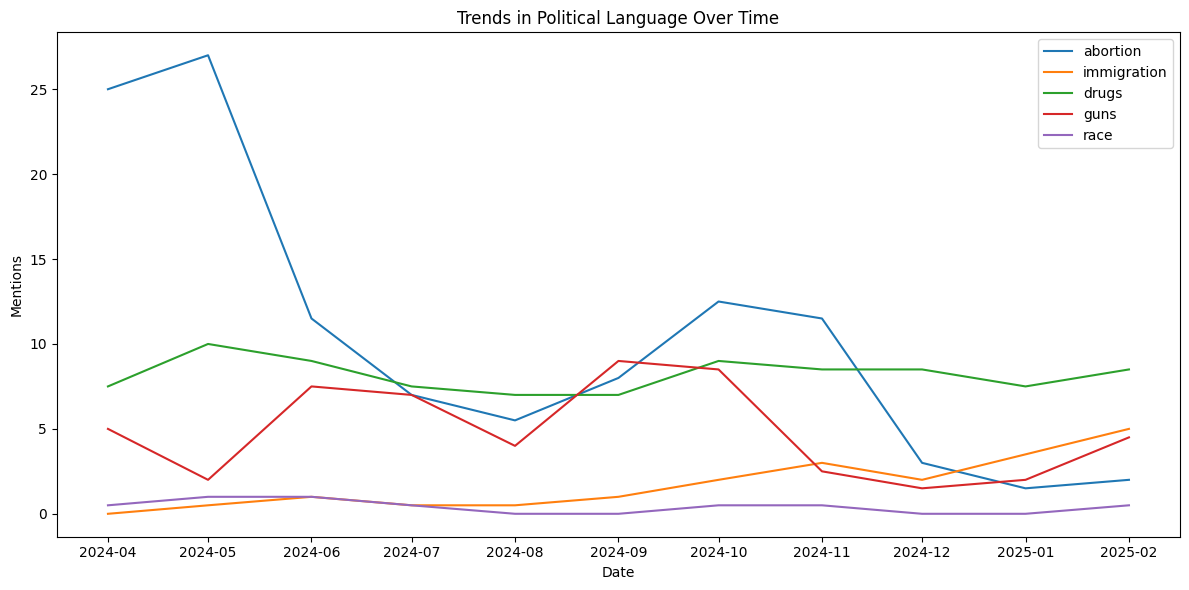

In [2]:
political_terms = {
    "abortion": ["pro-choice", "pro-life", "reproductive rights", "abortion ban"],
    "immigration": ["open borders", "illegal immigrant", "border wall", "DACA"],
    "drugs": ["war on drugs", "opioid crisis", "legalization", "fentanyl"],
    "guns": ["gun control", "2nd amendment", "mass shooting", "NRA"],
    "race": ["critical race theory", "BLM", "systemic racism", "white supremacy"]
    # Add more topics and terms as needed
}

def combine_text(row):
    # Safely get 'main' from headline if it's a dict
    headline = row['headline'].get('main') if isinstance(row['headline'], dict) else str(row['headline']) or ''
    
    # Convert everything else to strings, even if NaN
    abstract = str(row['abstract']) if pd.notnull(row['abstract']) else ''
    lead = str(row['lead_paragraph']) if pd.notnull(row['lead_paragraph']) else ''
    
    return ' '.join([headline, abstract, lead])

more_info['combined_text'] = more_info.apply(combine_text, axis=1)

import re
from collections import defaultdict

# Convert pub_date to just the date (or month for broader trend)
more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')

# Initialize count structure
term_counts = defaultdict(lambda: defaultdict(int))

# Iterate through rows and count term occurrences
for _, row in more_info.iterrows():
    text = row['combined_text'].lower()
    month = str(row['pub_month'])

    for topic, terms in political_terms.items():
        for term in terms:
            if re.search(rf'\b{re.escape(term.lower())}\b', text):
                term_counts[topic][month] += 1

# Convert to DataFrame
trend_df = pd.DataFrame(term_counts).fillna(0).astype(int)
trend_df.index = pd.to_datetime(trend_df.index)

# Optional: Smooth with rolling window
trend_df = trend_df.sort_index().rolling(window=2).mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for topic in political_terms.keys():
    plt.plot(trend_df.index, trend_df[topic], label=topic)

plt.title("Trends in Political Language Over Time")
plt.xlabel("Date")
plt.ylabel("Mentions")
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/w6/3q8zk6j94wb5nxvb3y79cxjc0000gr/T/ipykernel_36312/3322185933.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')


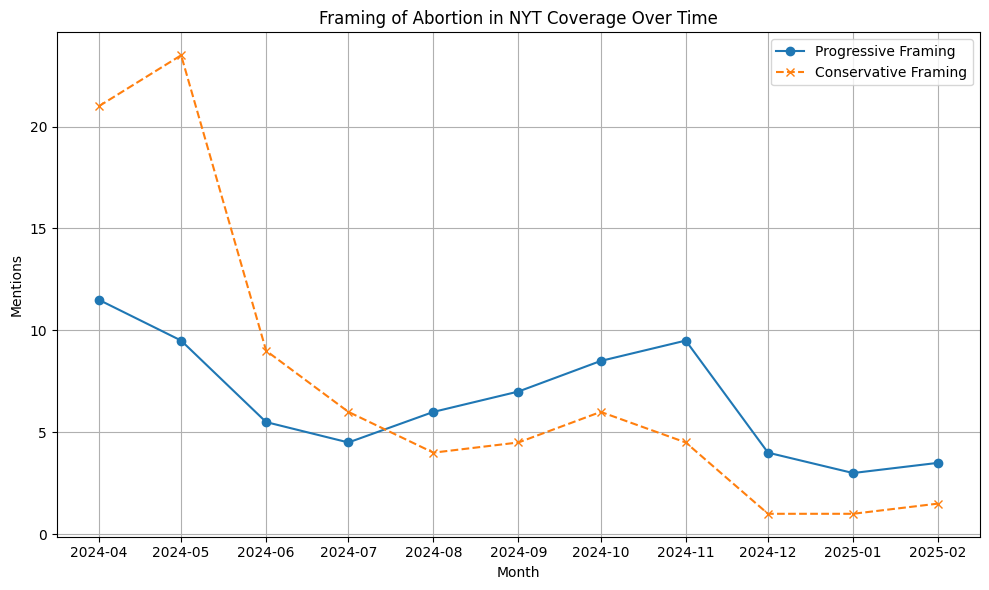

In [3]:
abortion_terms = {
    "progressive": [
        "reproductive rights", "right to choose", "pro-choice", "bodily autonomy", "abortion access"
    ],
    "conservative": [
        "abortion ban", "pro-life", "unborn child", "heartbeat bill", "abortion is murder"
    ]
}

from collections import defaultdict
import re

# Make sure pub_date is datetime
more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')

# Initialize a nested dictionary: {frame: {month: count}}
frame_counts = defaultdict(lambda: defaultdict(int))

for _, row in more_info.iterrows():
    text = row['combined_text'].lower()
    month = str(row['pub_month'])

    for frame, terms in abortion_terms.items():
        for term in terms:
            if re.search(rf'\b{re.escape(term.lower())}\b', text):
                frame_counts[frame][month] += 1

# Convert nested dict to DataFrame
frame_df = pd.DataFrame(frame_counts).fillna(0).astype(int)
frame_df.index = pd.to_datetime(frame_df.index)
frame_df = frame_df.sort_index()

# Optional smoothing
frame_df = frame_df.rolling(2).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(frame_df.index, frame_df['progressive'], label='Progressive Framing', linestyle='-', marker='o')
plt.plot(frame_df.index, frame_df['conservative'], label='Conservative Framing', linestyle='--', marker='x')

plt.title("Framing of Abortion in NYT Coverage Over Time")
plt.xlabel("Month")
plt.ylabel("Mentions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/w6/3q8zk6j94wb5nxvb3y79cxjc0000gr/T/ipykernel_36312/188144619.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  more_info['pub_month'] = more_info['pub_date'].dt.to_period('M')


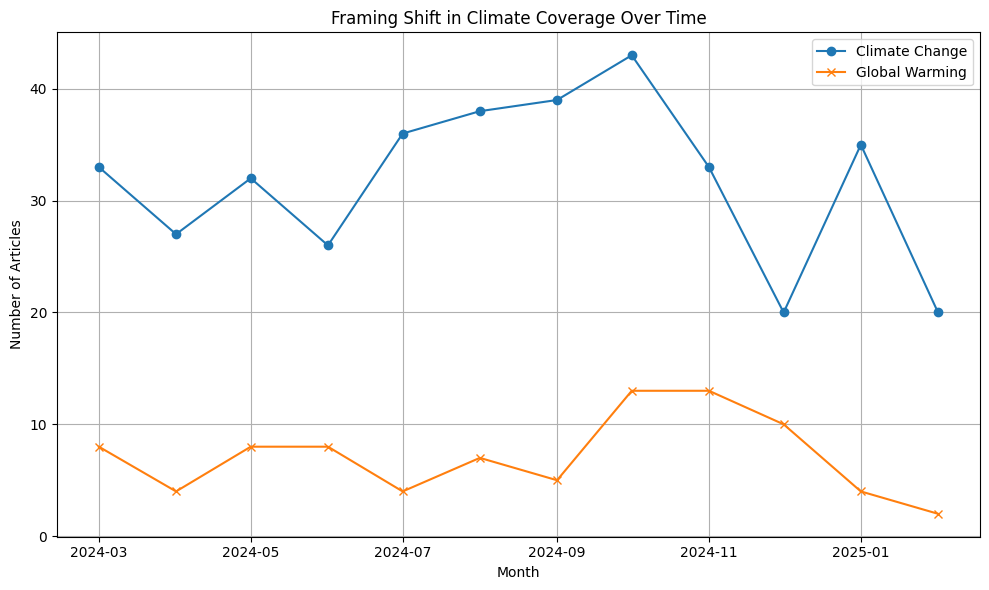

In [4]:
import pandas as pd

# Ensure pub_date is datetime
more_info['pub_date'] = pd.to_datetime(more_info['pub_date'])
more_info['pub_month'] = more_info['pub_date'].dt.to_period('M')

# Combine relevant fields into one text string
def combine_text(row):
    headline = row['headline'].get('main') if isinstance(row['headline'], dict) else str(row['headline']) or ''
    abstract = str(row['abstract']) if pd.notnull(row['abstract']) else ''
    lead = str(row['lead_paragraph']) if pd.notnull(row['lead_paragraph']) else ''
    return ' '.join([headline, abstract, lead])

more_info['combined_text'] = more_info.apply(combine_text, axis=1).str.lower()

# Case study: climate change vs global warming
framing_terms = {
    "climate_change": "climate change",
    "global_warming": "global warming"
}

from collections import defaultdict
import re

# Initialize structure
term_counts = defaultdict(lambda: defaultdict(int))

# Count each term per month
for _, row in more_info.iterrows():
    text = row['combined_text']
    month = str(row['pub_month'])

    for label, term in framing_terms.items():
        if re.search(rf'\b{re.escape(term)}\b', text):
            term_counts[label][month] += 1

# Convert to DataFrame
trend_df = pd.DataFrame(term_counts).fillna(0).astype(int)
trend_df.index = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(trend_df.index, trend_df['climate_change'], label='Climate Change', marker='o')
plt.plot(trend_df.index, trend_df['global_warming'], label='Global Warming', marker='x')

plt.title('Framing Shift in Climate Coverage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/w6/3q8zk6j94wb5nxvb3y79cxjc0000gr/T/ipykernel_36312/4206604918.py:77: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')


<Axes: title={'center': 'Monthly Polarization Markers in NYT Articles'}, xlabel='pub_month'>

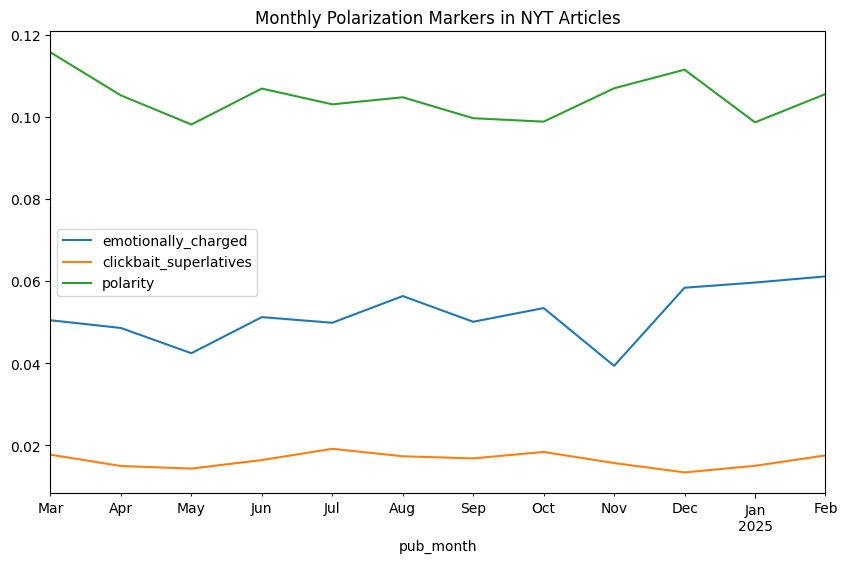

In [5]:
import re

def combine_text(row):
    # Extract headline text if it's a dict; otherwise, convert to string
    headline = row['headline'].get('main') if isinstance(row['headline'], dict) else str(row['headline']) or ''
    # Safely extract abstract and lead_paragraph (handle NaNs)
    abstract = str(row['abstract']) if pd.notnull(row['abstract']) else ''
    lead = str(row['lead_paragraph']) if pd.notnull(row['lead_paragraph']) else ''
    return ' '.join([headline, abstract, lead])

# Create the combined_text column
more_info['combined_text'] = more_info.apply(combine_text, axis=1)


polarized_terms = {
    'emotionally_charged': [
        'crisis', 'chaos', 'shocking', 'disaster', 'outrage', 'fury', 'slam', 'meltdown', 'breaking', 'emergency'
    ],
    'clickbait_superlatives': [
        'biggest', 'worst ever', 'must see', 'unbelievable', 'incredible', 'jaw-dropping', 'record-breaking'
    ],
    'uncertainty': [
        'could', 'might', 'may', 'possibly', 'is this', 'are we'
    ],
    'question_headlines': [
        '?'
    ]
}

def get_polarization_score(text):
    score = {key: 0 for key in polarized_terms}

    for category, terms in polarized_terms.items():
        for term in terms:
            if category == "question_headlines":
                if '?' in text:
                    score[category] += 1
            else:
                pattern = rf'\b{re.escape(term)}\b'
                matches = re.findall(pattern, text.lower())
                score[category] += len(matches)
    
    return pd.Series(score)

# Define the polarization columns based on your dictionary keys
polarization_cols = list(polarized_terms.keys())

# Drop them if they exist to avoid duplicates
more_info = more_info.drop(columns=[col for col in polarization_cols if col in more_info.columns], errors='ignore')

# Now compute and assign the new scores
polarization_scores = more_info['combined_text'].apply(get_polarization_score)
more_info = pd.concat([more_info, polarization_scores], axis=1)


from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    })


# Compute sentiment scores for each article
sentiment_scores = more_info['combined_text'].apply(get_sentiment)
# Add the sentiment columns to your DataFrame
more_info = pd.concat([more_info, sentiment_scores], axis=1)


# Mean polarization scores by section
section_summary = more_info.groupby('section_name')[
    ['emotionally_charged', 'clickbait_superlatives', 'uncertainty', 'question_headlines', 'polarity', 'subjectivity']
].mean().sort_values('emotionally_charged', ascending=False)

more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')
monthly_polarization = more_info.groupby('pub_month')[
    ['emotionally_charged', 'clickbait_superlatives', 'polarity']
].mean()

monthly_polarization.plot(figsize=(10,6), title="Monthly Polarization Markers in NYT Articles")



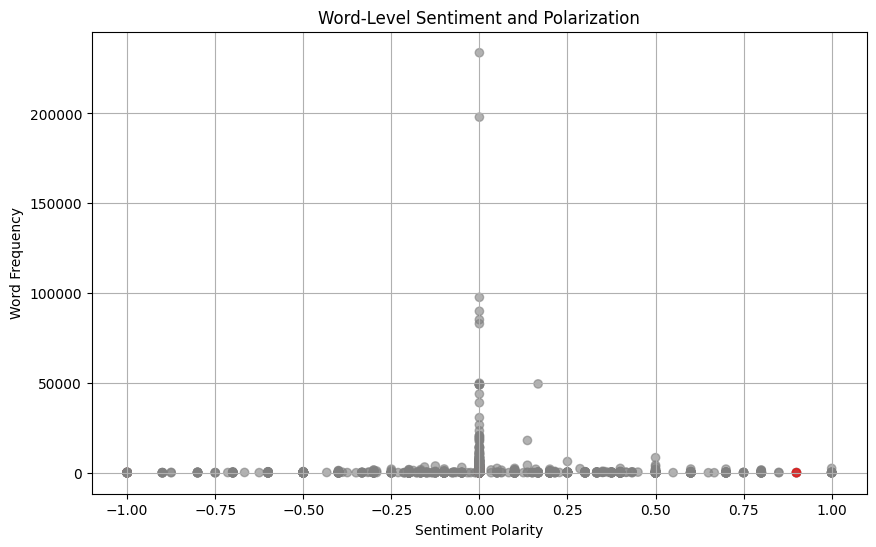

In [6]:
from collections import Counter
from gensim.utils import simple_preprocess

# Tokenize and count words
all_tokens = more_info["combined_text"].fillna("").map(simple_preprocess)
flat_words = [word for tokens in all_tokens for word in tokens]
word_counts = Counter(flat_words)
from textblob import TextBlob

def is_polarizing(word):
    for category, terms in polarized_terms.items():
        if word in terms:
            return True
    return False

# Build dataframe of top N words with sentiment and polarizing tag
top_words = pd.DataFrame([
    {
        "word": word,
        "count": count,
        "sentiment": TextBlob(word).sentiment.polarity,
        "polarizing": is_polarizing(word)
    }
    for word, count in word_counts.items() if count > 20  # filter out rare terms
])
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    top_words["sentiment"],
    top_words["count"],
    c=top_words["polarizing"].map({True: "red", False: "gray"}),
    alpha=0.6
)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Word Frequency")
plt.title("Word-Level Sentiment and Polarization")
plt.grid(True)
plt.show()


/var/folders/w6/3q8zk6j94wb5nxvb3y79cxjc0000gr/T/ipykernel_36312/952432833.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')


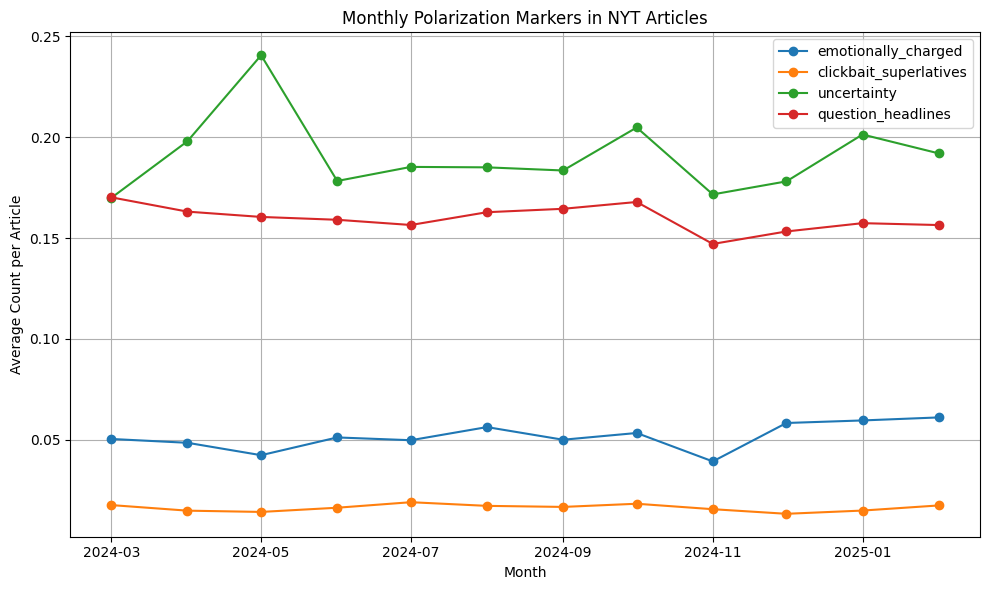

In [9]:
# Ensure pub_date is datetime and create a 'pub_month' period column if not already done
more_info['pub_month'] = pd.to_datetime(more_info['pub_date']).dt.to_period('M')

# Group by month and calculate the mean polarization scores per article
monthly_polarization = more_info.groupby('pub_month')[polarization_cols].mean()

# Plot time series for each polarization category
plt.figure(figsize=(10, 6))
for col in polarization_cols:
    plt.plot(monthly_polarization.index.to_timestamp(), monthly_polarization[col], marker='o', label=col)

plt.title("Monthly Polarization Markers in NYT Articles")
plt.xlabel("Month")
plt.ylabel("Average Count per Article")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Total polarization scores by category:
 uncertainty               9370
question_headlines        7850
emotionally_charged       2527
clickbait_superlatives     804
dtype: int64


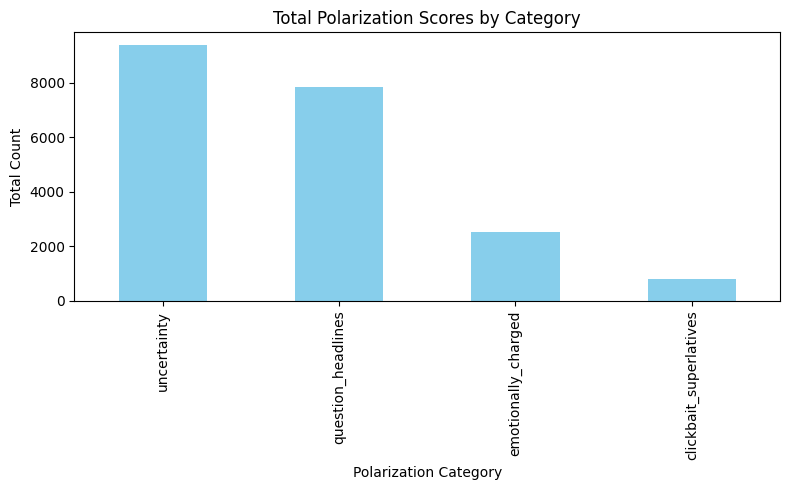

Average polarization scores per article:
 uncertainty               0.190874
question_headlines        0.159910
emotionally_charged       0.051477
clickbait_superlatives    0.016378
dtype: float64


In [10]:
import matplotlib.pyplot as plt

# Define polarization category columns (keys from your dictionary)
polarization_cols = list(polarized_terms.keys())

# Calculate total frequency across all articles
total_scores = more_info[polarization_cols].sum().sort_values(ascending=False)
print("Total polarization scores by category:\n", total_scores)

# Plot overall totals
plt.figure(figsize=(8, 5))
total_scores.plot(kind='bar', color='skyblue', title="Total Polarization Scores by Category")
plt.ylabel("Total Count")
plt.xlabel("Polarization Category")
plt.tight_layout()
plt.show()

# Calculate average frequency per article
avg_scores = more_info[polarization_cols].mean().sort_values(ascending=False)
print("Average polarization scores per article:\n", avg_scores)


Average polarization scores by section:
                              emotionally_charged  clickbait_superlatives  \
section_name                                                               
Admin                                   0.000000                0.000000   
Arts                                    0.027201                0.025799   
Automobiles                             0.000000                0.000000   
Books                                   0.039974                0.009026   
Briefing                                0.047619                0.020665   
Business Day                            0.050924                0.035355   
Climate                                 0.133047                0.038627   
Corrections                             0.013774                0.005510   
Crosswords & Games                      0.000663                0.000663   
Education                               0.000000                0.000000   
Fashion & Style                         0.05618

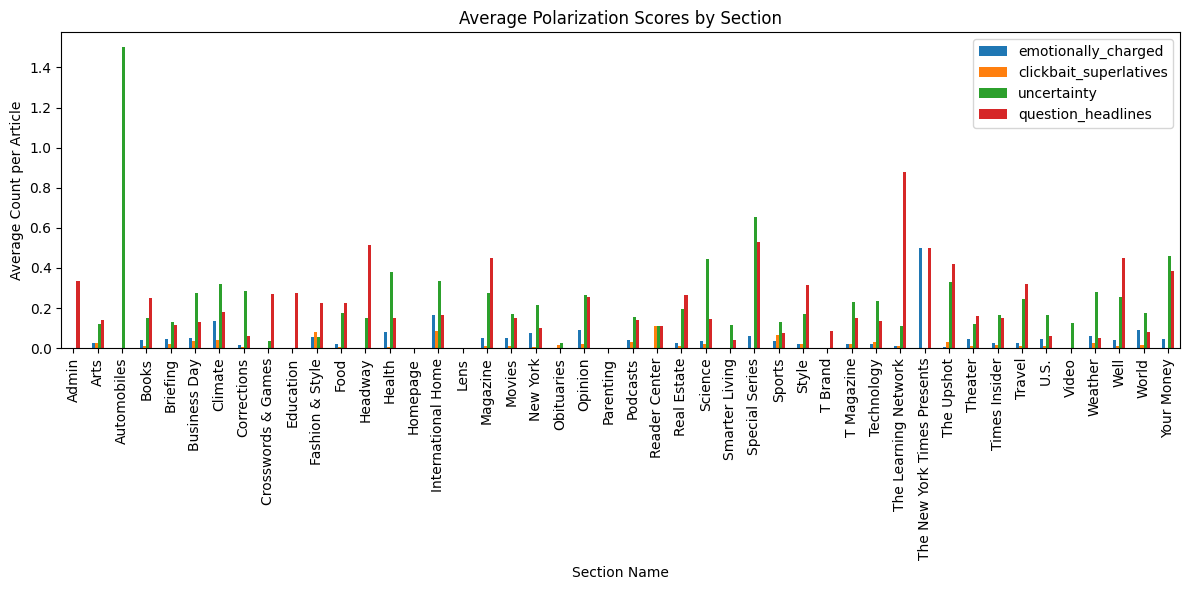

In [11]:
# Group articles by section_name and calculate mean scores for each category
section_summary = more_info.groupby('section_name')[polarization_cols].mean()

# Display the section summary
print("Average polarization scores by section:\n", section_summary)

# Plot the results as a grouped bar chart
section_summary.plot(kind='bar', figsize=(12, 6), title="Average Polarization Scores by Section")
plt.ylabel("Average Count per Article")
plt.xlabel("Section Name")
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import ast
import json
from textblob import TextBlob

# Robust function to extract keyword values
def extract_keyword_values(keyword_entry):
    keywords = []
    # If already a list, iterate directly
    if isinstance(keyword_entry, list):
        data = keyword_entry
    # If it's a string, try JSON parsing first, then fallback to ast.literal_eval
    elif isinstance(keyword_entry, str):
        try:
            data = json.loads(keyword_entry)
        except Exception as e:
            try:
                data = ast.literal_eval(keyword_entry)
            except Exception as e2:
                # If parsing fails, log the error and return an empty list
                print("Error parsing keywords:", e2)
                return []
    else:
        return []
    
    # Now extract the keyword values from the list of dictionaries
    for d in data:
        if isinstance(d, dict) and 'value' in d:
            keywords.append(d['value'])
    return keywords

# Collect all keywords from the dataset
all_keywords = []
for idx, row in more_info.iterrows():
    kws = extract_keyword_values(row['keywords'])
    all_keywords.extend(kws)

# Create a set of unique keywords
unique_keywords = set(all_keywords)

# Compute sentiment polarity for each unique keyword using TextBlob
keyword_sentiments = {}
for keyword in unique_keywords:
    polarity = TextBlob(keyword).sentiment.polarity
    keyword_sentiments[keyword] = polarity

# Sort keywords by absolute polarity (most strongly positive or negative)
sorted_keywords = sorted(keyword_sentiments.items(), key=lambda x: abs(x[1]), reverse=True)

# Get top 15 most polarizing keywords
top_15 = sorted_keywords[:15]

print("Top 15 Most Polarizing Keywords:")
for kw, sentiment in top_15:
    print(f"{kw}: {sentiment}")


Top 15 Most Polarizing Keywords:
Boring Company: -1.0
Drilling and Boring: -1.0
His Very Best: Jimmy Carter, a Life (Book): 1.0
It's a Marvelous Paper Bag World! (Play): 1.0
Best Interests (TV Program): 1.0
Pitch Perfect (Movie): 1.0
Hitler and the Nazis: Evil on Trial (TV Program): -1.0
Cruel Intentions (Movie): -1.0
Best BUY Company Inc: 1.0
Perfect Strangers (TV Program): 1.0
Ruthless! (Play): -1.0
The Perfect Nanny (Book): 1.0
It's a Wonderful Life (Movie): 1.0
Insane Clown Posse: -1.0
The Marvelous Mrs Maisel (TV Program): 1.0


Frequency of headline differences:
 headline_diff
False    25365
True     23725
Name: count, dtype: int64


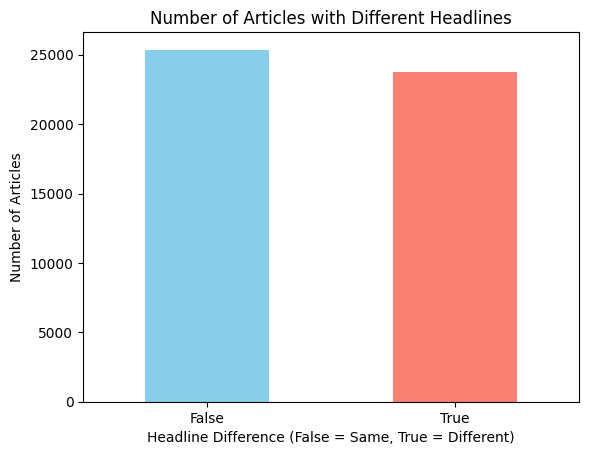

Mean main_sentiment (different headlines): 0.03989859760210129
Mean main_sentiment (same headlines): 0.046881505322910806
Mean print_sentiment (different headlines): 0.02747210497616188
Mean print_sentiment (same headlines): 0.046881505322910806
T-test on main_sentiment differences: t_stat = -3.451, p-value = 0.001


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.stats import ttest_ind

# 1. Create a new column that indicates if print and online headlines differ
# (Assuming you have already created main_headline and print_headline)
more_info['headline_diff'] = more_info.apply(lambda row: row['main_headline'] != row['print_headline'], axis=1)

# 2. Frequency analysis: count how many articles have different headlines
diff_counts = more_info['headline_diff'].value_counts()
print("Frequency of headline differences:\n", diff_counts)

# Visualize the frequency with a bar chart
diff_counts.plot(kind='bar', color=['skyblue', 'salmon'], 
                 title='Number of Articles with Different Headlines')
plt.xlabel('Headline Difference (False = Same, True = Different)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

# 3. Comparative analysis: Compare sentiment for articles with differing headlines
# Define a simple function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Compute sentiment for main_headline and print_headline
more_info['main_sentiment'] = more_info['main_headline'].apply(get_sentiment)
more_info['print_sentiment'] = more_info['print_headline'].apply(get_sentiment)

# Group the articles by whether the headlines differ
diff_group = more_info[more_info['headline_diff']]
same_group = more_info[~more_info['headline_diff']]

# Compute average sentiment for each group
print("Mean main_sentiment (different headlines):", diff_group['main_sentiment'].mean())
print("Mean main_sentiment (same headlines):", same_group['main_sentiment'].mean())
print("Mean print_sentiment (different headlines):", diff_group['print_sentiment'].mean())
print("Mean print_sentiment (same headlines):", same_group['print_sentiment'].mean())

# Perform a t-test on the main_headline sentiment scores between groups
t_stat, p_value = ttest_ind(diff_group['main_sentiment'].dropna(), same_group['main_sentiment'].dropna())
print("T-test on main_sentiment differences: t_stat = {:.3f}, p-value = {:.3f}".format(t_stat, p_value))

Editorial Strategy:
It might indicate that when the print headline is modified (i.e. different from the online/main headline), there is a tendency for it to adopt a slightly less positive tone. This could reflect an editorial strategy aimed at tailoring the message for print audiences.

In [ ]:
#TESTING of per-topic co-occurance networks: run after 02-webapp_data!
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Get the list of all docs, and their assigned topics
docs = [" ".join(t) for t in texts]   # your preprocessed docs as before
topics, probs = topic_model.transform(docs)  

# Define a helper to build & plot a network for a single topic
def plot_topic_network(topic_id, min_cooccurrence=3, top_n_phrases=50):
    # 2a) Select docs where this topic is dominant
    topic_docs = [
        docs[i] for i, t in enumerate(topics) 
        if t == topic_id
    ]
    if not topic_docs:
        print(f"No docs for topic {topic_id}")
        return

    # 2b) Extract top bigrams+trigrams in that subset
    vec = CountVectorizer(ngram_range=(2,3),
                          stop_words="english",
                          max_features=top_n_phrases)
    X = vec.fit_transform(topic_docs)
    phrases = vec.get_feature_names_out()

    # 2c) Build co-occurrence counts
    co = {}
    for doc in topic_docs:
        present = [p for p in phrases if p in doc]
        for i in range(len(present)):
            for j in range(i+1, len(present)):
                a,b = sorted([present[i], present[j]])
                co.setdefault((a,b), 0)
                co[(a,b)] += 1

    # 2d) Build the graph, filtering weak edges
    G = nx.Graph()
    for p in phrases:
        G.add_node(p)
    for (a,b), w in co.items():
        if w >= min_cooccurrence:
            G.add_edge(a, b, weight=w)

    # 2e) Plot with a spring layout
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    weights = [G[u][v]['weight']*0.5 for u,v in G.edges()]
    nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.4)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(f"Co-occurrence Network for Topic {topic_id}")
    plt.axis("off")
    plt.show()


# Example: plot networks for the first 5 topics
#for tid in topic_model.get_topic_info().query("Topic >= 0")["Topic"].head(5):
#    plot_topic_network(int(tid), min_cooccurrence=5, top_n_phrases=50)
